In [1]:
import pandas as pd

# Load the datasets
product_a_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
fb_impressions_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')
google_clicks_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')

# Convert 'Day Index' to datetime format in each DataFrame
product_a_df['Day Index'] = pd.to_datetime(product_a_df['Day Index'], errors='coerce')
fb_impressions_df['Day Index'] = pd.to_datetime(fb_impressions_df['Day Index'], errors='coerce')
google_clicks_df['Day Index'] = pd.to_datetime(google_clicks_df['Day Index'], errors='coerce')

# Merge the datasets on 'Day Index' with an outer join
merged_df = (
    product_a_df
    .merge(fb_impressions_df, on='Day Index', how='outer')
    .merge(google_clicks_df, on='Day Index', how='outer')
)

# Drop rows with NaT in 'Day Index'
merged_df = merged_df.dropna(subset=['Day Index'])

# Fill missing values in 'Quantity', 'Impressions', and 'Clicks' columns with 0
merged_df = merged_df.fillna({
    'Quantity': 0,
    'Impressions': 0,
    'Clicks': 0
})

# Display the merged DataFrame
print(merged_df)

# Optionally, save the merged dataset to a new Excel file
merged_df.to_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\Merged_ProductA_Dataset_Filled_NoNaT.xlsx', index=False)


     Day Index  Quantity  Impressions  Clicks
0   2021-12-01      14.0   620.000000   445.0
1   2021-12-02      10.0   890.000000   433.0
2   2021-12-03      13.0   851.000000   424.0
3   2021-12-04      22.0   881.000000   427.0
4   2021-12-05      33.0   678.000000   451.0
..         ...       ...          ...     ...
207 2022-06-26      13.0  1814.776102   114.0
208 2022-06-27      16.0  1817.263487   106.0
209 2022-06-28      13.0  1819.750871   109.0
210 2022-06-29      16.0  1822.238256    60.0
211 2022-06-30       8.0     0.000000    65.0

[212 rows x 4 columns]


In [2]:
import pandas as pd

# Load datasets
product_a_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
fb_impressions_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')
google_clicks_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')

# Ensure 'Day Index' column is in datetime format for consistent merging
product_a_df['Day Index'] = pd.to_datetime(product_a_df['Day Index'], errors='coerce')
fb_impressions_df['Day Index'] = pd.to_datetime(fb_impressions_df['Day Index'], errors='coerce')
google_clicks_df['Day Index'] = pd.to_datetime(google_clicks_df['Day Index'], errors='coerce')

# Merge datasets on 'Day Index' column
merged_df = (
    product_a_df
    .merge(fb_impressions_df, on='Day Index', how='outer')
    .merge(google_clicks_df, on='Day Index', how='outer')
)

# Remove rows with any missing data
merged_df_clean = merged_df.dropna()

# Check if there are any missing values in the cleaned dataset
missing_data = merged_df_clean.isnull().sum()

print("Merged dataset without missing data:")
print(merged_df_clean)
print("\nCheck for missing data in each column (should be zero if no missing data):")
print(missing_data)


Merged dataset without missing data:
     Day Index  Quantity  Impressions  Clicks
0   2021-12-01      14.0          620   445.0
1   2021-12-02      10.0          890   433.0
2   2021-12-03      13.0          851   424.0
3   2021-12-04      22.0          881   427.0
4   2021-12-05      33.0          678   451.0
..         ...       ...          ...     ...
206 2022-06-25      16.0  1812.288717   120.0
207 2022-06-26      13.0  1814.776102   114.0
208 2022-06-27      16.0  1817.263487   106.0
209 2022-06-28      13.0  1819.750871   109.0
210 2022-06-29      16.0  1822.238256    60.0

[211 rows x 4 columns]

Check for missing data in each column (should be zero if no missing data):
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


In [3]:
import pandas as pd

# Function to treat outliers based on the 5th and 97th percentiles
def treat_outliers(df, column):
    # Calculate the 5th and 97th percentiles
    low_end = df[column].quantile(0.05)
    high_end = df[column].quantile(0.97)

    # Use .loc to replace values below 5th percentile and above 97th percentile
    df.loc[df[column] < low_end, column] = low_end
    df.loc[df[column] > high_end, column] = high_end

    print(f"Outlier treatment for '{column}' column complete.")
    print(f"Low-end threshold (5th percentile): {low_end}")
    print(f"High-end threshold (97th percentile): {high_end}")

# Apply outlier treatment to 'Impressions' column
if 'Impressions' in merged_df_clean.columns:
    treat_outliers(merged_df_clean, 'Impressions')

# Apply outlier treatment to 'Clicks' column, if needed
if 'Clicks' in merged_df_clean.columns:
    treat_outliers(merged_df_clean, 'Clicks')

# Display summary statistics to verify changes
print("Summary of the dataset after treating outliers:")
print(merged_df_clean[['Impressions', 'Clicks']].describe())


Outlier treatment for 'Impressions' column complete.
Low-end threshold (5th percentile): 901.5
High-end threshold (97th percentile): 2415.399999999999
Outlier treatment for 'Clicks' column complete.
Low-end threshold (5th percentile): 111.5
High-end threshold (97th percentile): 588.4999999999998
Summary of the dataset after treating outliers:
           Clicks
count  211.000000
mean   359.199052
std    160.811456
min    111.500000
25%    155.000000
50%    404.000000
75%    493.500000
max    588.500000


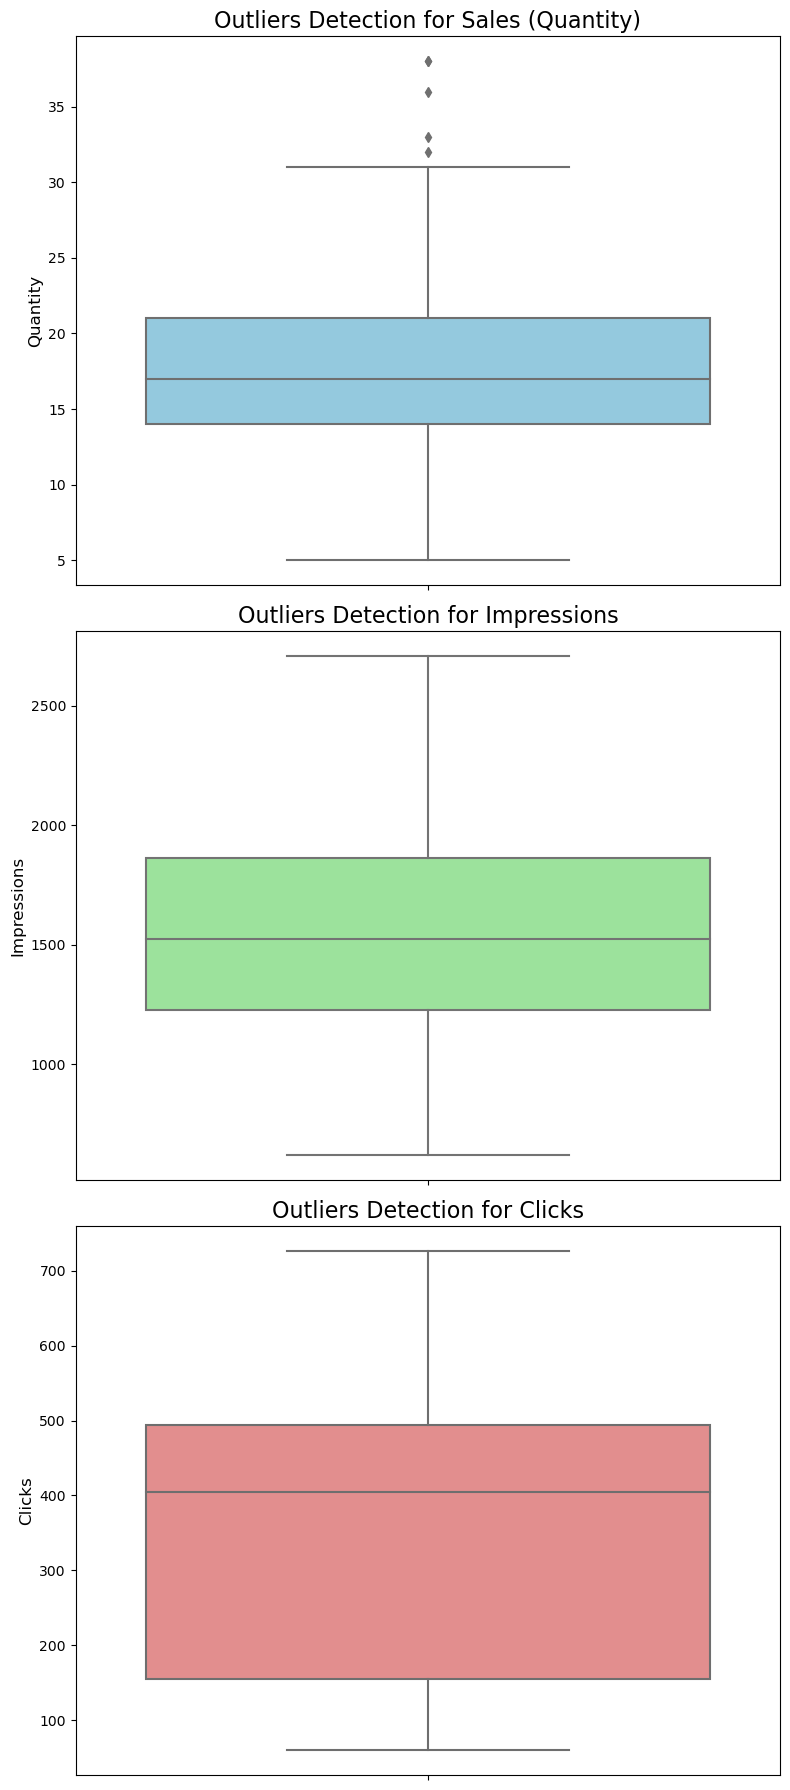

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your datasets (replace the file paths with your actual paths)
product_a_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')  # Replace with your file path
fb_impressions_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')  # Replace with your file path
google_clicks_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')  # Replace with your file path

# Convert 'Day Index' columns to datetime in all datasets
product_a_df['Day Index'] = pd.to_datetime(product_a_df['Day Index'], errors='coerce')
fb_impressions_df['Day Index'] = pd.to_datetime(fb_impressions_df['Day Index'], errors='coerce')
google_clicks_df['Day Index'] = pd.to_datetime(google_clicks_df['Day Index'], errors='coerce')

# Convert 'Impressions' to numeric, forcing errors to NaN (in case of non-numeric values)
fb_impressions_df['Impressions'] = pd.to_numeric(fb_impressions_df['Impressions'], errors='coerce')

# Ensure that 'Day Index' exists in all datasets and is in the correct format
if 'Day Index' not in product_a_df.columns or 'Day Index' not in fb_impressions_df.columns or 'Day Index' not in google_clicks_df.columns:
    raise ValueError("One or more datasets do not contain the 'Day Index' column.")

# Merge the datasets on 'Day Index' using an outer join
merged_df = (
    product_a_df
    .merge(fb_impressions_df, on='Day Index', how='outer')
    .merge(google_clicks_df, on='Day Index', how='outer')
)

# Drop rows with NaN values in the relevant columns ('Quantity', 'Impressions', and 'Clicks')
merged_df_clean = merged_df.dropna(subset=['Quantity', 'Impressions', 'Clicks'])

# Plot Boxplots for Outlier Detection (vertically)
plt.figure(figsize=(8, 18))  # Adjust the figure size for vertical display

# Boxplot for 'Quantity' (only if it's numeric)
if pd.api.types.is_numeric_dtype(merged_df_clean['Quantity']):
    plt.subplot(3, 1, 1)  # This places the plot in the first position of a 3x1 grid
    sns.boxplot(y=merged_df_clean['Quantity'], color='skyblue')
    plt.title('Outliers Detection for Sales (Quantity)', fontsize=16)
    plt.ylabel('Quantity', fontsize=12)

# Boxplot for 'Impressions' (only if it's numeric)
if pd.api.types.is_numeric_dtype(merged_df_clean['Impressions']):
    plt.subplot(3, 1, 2)  # This places the plot in the second position of a 3x1 grid
    sns.boxplot(y=merged_df_clean['Impressions'], color='lightgreen')
    plt.title('Outliers Detection for Impressions', fontsize=16)
    plt.ylabel('Impressions', fontsize=12)

# Boxplot for 'Clicks' (only if it's numeric)
if pd.api.types.is_numeric_dtype(merged_df_clean['Clicks']):
    plt.subplot(3, 1, 3)  # This places the plot in the third position of a 3x1 grid
    sns.boxplot(y=merged_df_clean['Clicks'], color='lightcoral')
    plt.title('Outliers Detection for Clicks', fontsize=16)
    plt.ylabel('Clicks', fontsize=12)

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()







   

In [5]:
import pandas as pd

# Load your three datasets (replace with the correct file paths)
product_a_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
fb_impressions_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')
google_clicks_df = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')

# Ensure 'Day Index' is converted to datetime format
product_a_df['Day Index'] = pd.to_datetime(product_a_df['Day Index'], errors='coerce')
fb_impressions_df['Day Index'] = pd.to_datetime(fb_impressions_df['Day Index'], errors='coerce')
google_clicks_df['Day Index'] = pd.to_datetime(google_clicks_df['Day Index'], errors='coerce')

# Merge the datasets on 'Day Index' (use outer join to keep all rows)
merged_df = (
    product_a_df
    .merge(fb_impressions_df, on='Day Index', how='outer')
    .merge(google_clicks_df, on='Day Index', how='outer')
)

# Add new columns for analysis
merged_df['Month'] = merged_df['Day Index'].dt.month  # January = 1, February = 2, etc.
merged_df['DayOfWeek'] = merged_df['Day Index'].dt.dayofweek  # 0 = Monday, 6 = Sunday
merged_df['IsWeekend'] = merged_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # 1 if Saturday/Sunday
merged_df['WeekOfYear'] = merged_df['Day Index'].dt.isocalendar().week
merged_df['DayOfMonth'] = merged_df['Day Index'].dt.day

# Fill NaN values with a default value (e.g., 0) before casting to integers
merged_df['Month'] = merged_df['Month'].fillna(0).astype(int)
merged_df['DayOfWeek'] = merged_df['DayOfWeek'].fillna(0).astype(int)
merged_df['IsWeekend'] = merged_df['IsWeekend'].fillna(0).astype(int)
merged_df['WeekOfYear'] = merged_df['WeekOfYear'].fillna(0).astype(int)
merged_df['DayOfMonth'] = merged_df['DayOfMonth'].fillna(0).astype(int)

# Display the first few rows of the merged DataFrame as a table
print(merged_df.head())  # This will print the first 5 rows of the table

# Save the updated dataset to an Excel file
merged_df.to_excel('Merged_ProductA_Cleaned.xlsx', index=False)



   Day Index  Quantity Impressions  Clicks  Month  DayOfWeek  IsWeekend  \
0 2021-12-01      14.0         620   445.0     12          2          0   
1 2021-12-02      10.0         890   433.0     12          3          0   
2 2021-12-03      13.0         851   424.0     12          4          0   
3 2021-12-04      22.0         881   427.0     12          5          1   
4 2021-12-05      33.0         678   451.0     12          6          1   

   WeekOfYear  DayOfMonth  
0          48           1  
1          48           2  
2          48           3  
3          48           4  
4          48           5  


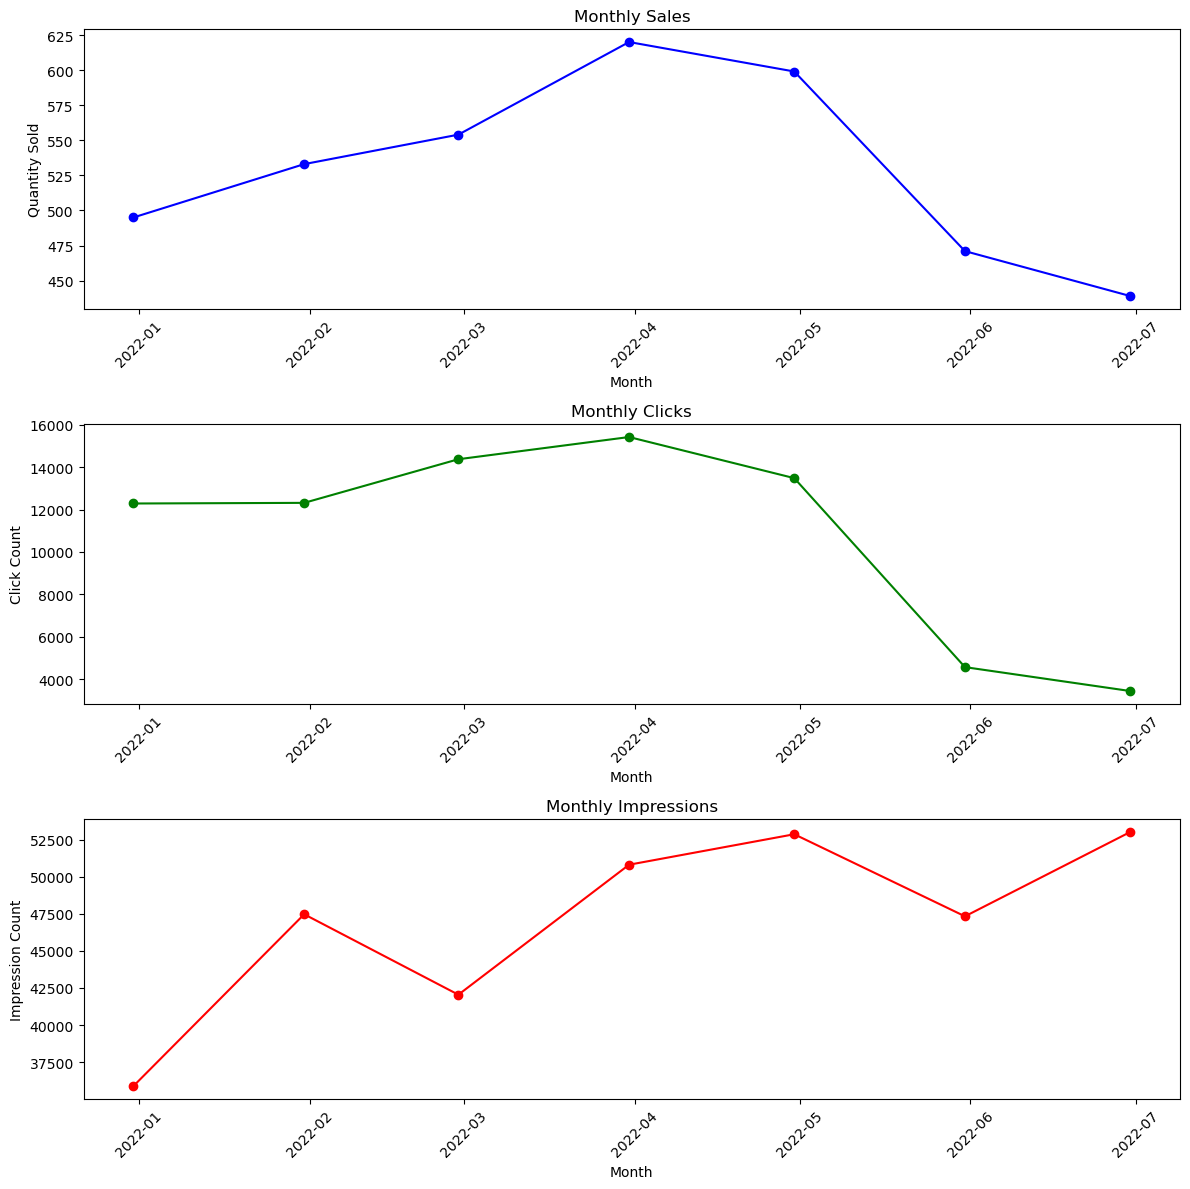

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (adjust paths accordingly)
sales_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
clicks_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')
impressions_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')

# Ensure the 'Day Index' columns are in datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
clicks_data['Day Index'] = pd.to_datetime(clicks_data['Day Index'], errors='coerce')
impressions_data['Day Index'] = pd.to_datetime(impressions_data['Day Index'], errors='coerce')

# Merge datasets on 'Day Index'
merged_data = pd.merge(sales_data, clicks_data, on='Day Index', how='inner')
merged_data = pd.merge(merged_data, impressions_data, on='Day Index', how='inner')

# Set 'Day Index' as the index
merged_data.set_index('Day Index', inplace=True)

# Resample the data by month for Sales, Clicks, and Impressions
monthly_sales = merged_data['Quantity'].resample('M').sum()
monthly_clicks = merged_data['Clicks'].resample('M').sum()
monthly_impressions = merged_data['Impressions'].resample('M').sum()

# Plotting the Sales, Clicks, and Impressions data by month
plt.figure(figsize=(12, 12))

# Plot Monthly Sales
plt.subplot(3, 1, 1)
plt.plot(monthly_sales, marker='o', color='blue', label='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

# Plot Monthly Clicks
plt.subplot(3, 1, 2)
plt.plot(monthly_clicks, marker='o', color='green', label='Clicks')
plt.title('Monthly Clicks')
plt.xlabel('Month')
plt.ylabel('Click Count')
plt.xticks(rotation=45)

# Plot Monthly Impressions
plt.subplot(3, 1, 3)
plt.plot(monthly_impressions, marker='o', color='red', label='Impressions')
plt.title('Monthly Impressions')
plt.xlabel('Month')
plt.ylabel('Impression Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


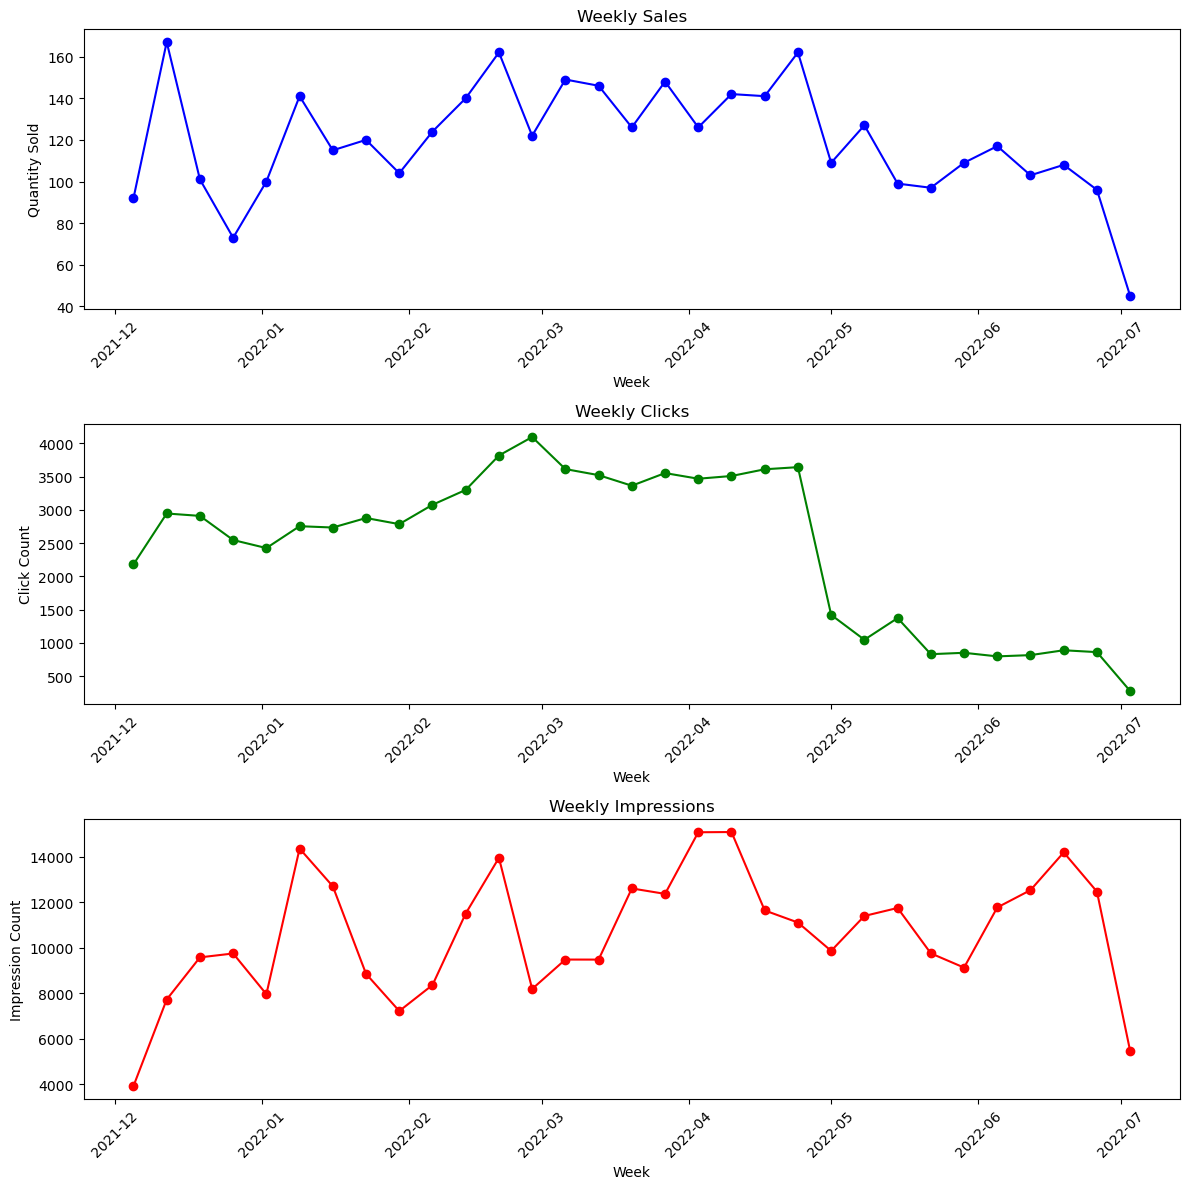

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (adjust paths accordingly)
sales_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
clicks_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')
impressions_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')

# Ensure the 'Day Index' columns are in datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
clicks_data['Day Index'] = pd.to_datetime(clicks_data['Day Index'], errors='coerce')
impressions_data['Day Index'] = pd.to_datetime(impressions_data['Day Index'], errors='coerce')

# Merge datasets on 'Day Index'
merged_data = pd.merge(sales_data, clicks_data, on='Day Index', how='inner')
merged_data = pd.merge(merged_data, impressions_data, on='Day Index', how='inner')

# Set 'Day Index' as the index
merged_data.set_index('Day Index', inplace=True)

# Resample the data by week for Sales, Clicks, and Impressions
weekly_sales = merged_data['Quantity'].resample('W').sum()
weekly_clicks = merged_data['Clicks'].resample('W').sum()
weekly_impressions = merged_data['Impressions'].resample('W').sum()

# Plotting the Sales, Clicks, and Impressions data by week
plt.figure(figsize=(12, 12))

# Plot Weekly Sales
plt.subplot(3, 1, 1)
plt.plot(weekly_sales, marker='o', color='blue', label='Sales')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

# Plot Weekly Clicks
plt.subplot(3, 1, 2)
plt.plot(weekly_clicks, marker='o', color='green', label='Clicks')
plt.title('Weekly Clicks')
plt.xlabel('Week')
plt.ylabel('Click Count')
plt.xticks(rotation=45)

# Plot Weekly Impressions
plt.subplot(3, 1, 3)
plt.plot(weekly_impressions, marker='o', color='red', label='Impressions')
plt.title('Weekly Impressions')
plt.xlabel('Week')
plt.ylabel('Impression Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

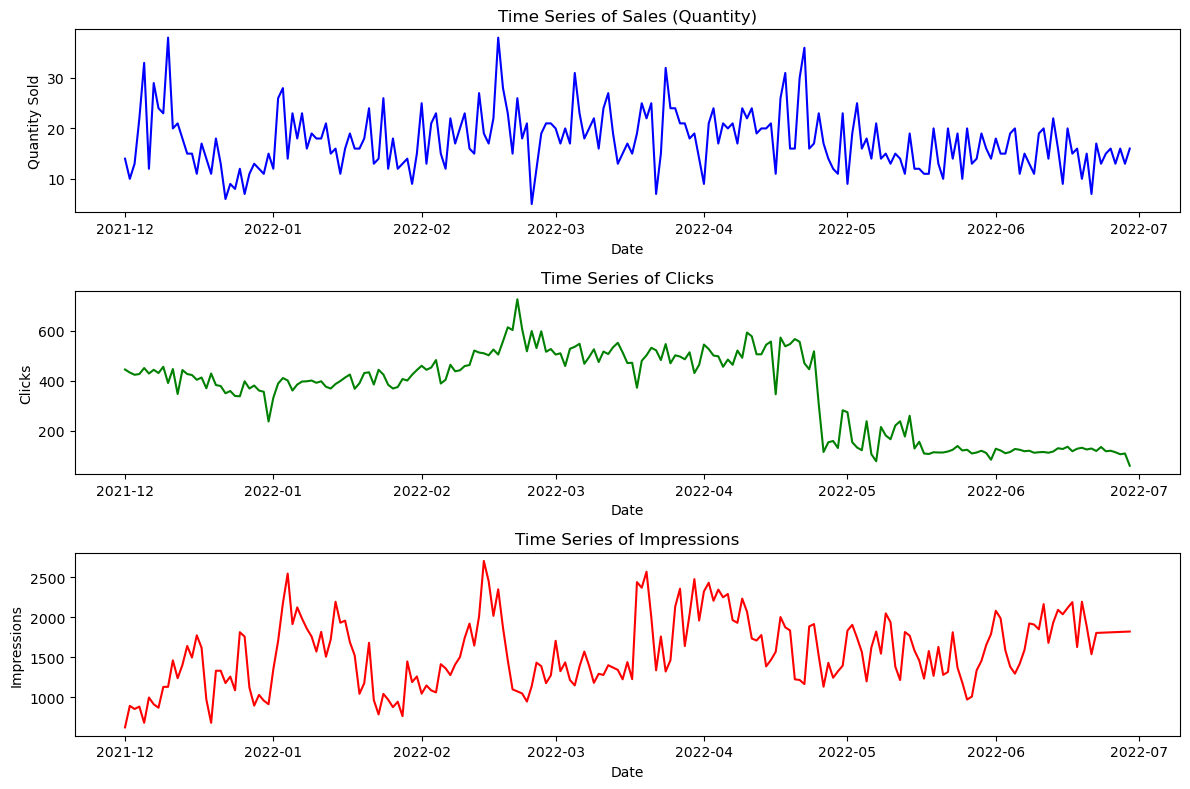

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (adjust paths accordingly)
sales_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
clicks_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')
impressions_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')

# Ensure the 'Day Index' columns are in datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
clicks_data['Day Index'] = pd.to_datetime(clicks_data['Day Index'], errors='coerce')
impressions_data['Day Index'] = pd.to_datetime(impressions_data['Day Index'], errors='coerce')

# Merge datasets on 'Day Index'
merged_data = pd.merge(sales_data, clicks_data, on='Day Index', how='inner')
merged_data = pd.merge(merged_data, impressions_data, on='Day Index', how='inner')

# Set 'Day Index' as the index
merged_data.set_index('Day Index', inplace=True)

# Handle missing values - forward fill
merged_data.fillna(method='ffill', inplace=True)

# Time Series Analysis for Quantity, Clicks, and Impressions (Trend)
plt.figure(figsize=(12, 8))

# Plot Sales (Quantity)
plt.subplot(3, 1, 1)
plt.plot(merged_data['Quantity'], color='blue', label='Sales (Quantity)')
plt.title('Time Series of Sales (Quantity)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Plot Clicks
plt.subplot(3, 1, 2)
plt.plot(merged_data['Clicks'], color='green', label='Clicks')
plt.title('Time Series of Clicks')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Plot Impressions
plt.subplot(3, 1, 3)
plt.plot(merged_data['Impressions'], color='red', label='Impressions')
plt.title('Time Series of Impressions')
plt.xlabel('Date')
plt.ylabel('Impressions')

plt.tight_layout()
plt.show()

Correlation Matrix:
             Quantity    Clicks  Impressions
Quantity     1.000000  0.367207     0.099478
Clicks       0.367207  1.000000    -0.071568
Impressions  0.099478 -0.071568     1.000000


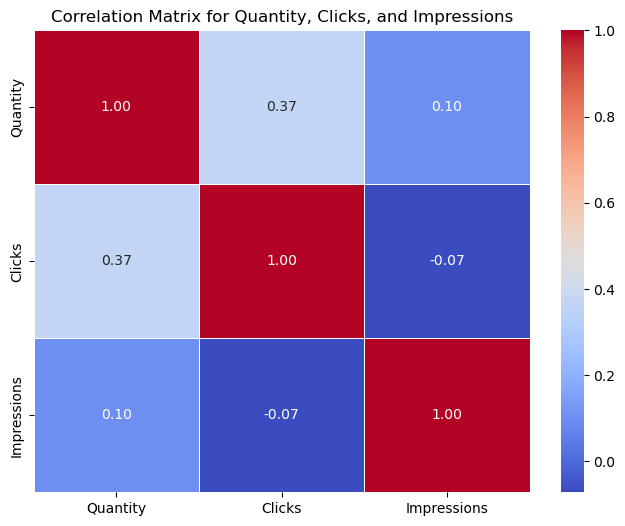

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (adjust paths accordingly)
sales_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA.xlsx')
clicks_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_google_clicks.xlsx')
impressions_data = pd.read_excel(r'C:\Users\cncha\OneDrive\Documents\chandu 522\infosys internship\ProductA_fb_impressions.xlsx')

# Ensure the 'Day Index' columns are in datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
clicks_data['Day Index'] = pd.to_datetime(clicks_data['Day Index'], errors='coerce')
impressions_data['Day Index'] = pd.to_datetime(impressions_data['Day Index'], errors='coerce')

# Merge datasets on 'Day Index'
merged_data = pd.merge(sales_data, clicks_data, on='Day Index', how='inner')
merged_data = pd.merge(merged_data, impressions_data, on='Day Index', how='inner')

# Set 'Day Index' as the index
merged_data.set_index('Day Index', inplace=True)

# Handle missing values - forward fill
merged_data.fillna(method='ffill', inplace=True)

# Calculate the correlation matrix
correlation_matrix = merged_data[['Quantity', 'Clicks', 'Impressions']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Quantity, Clicks, and Impressions')
plt.show()



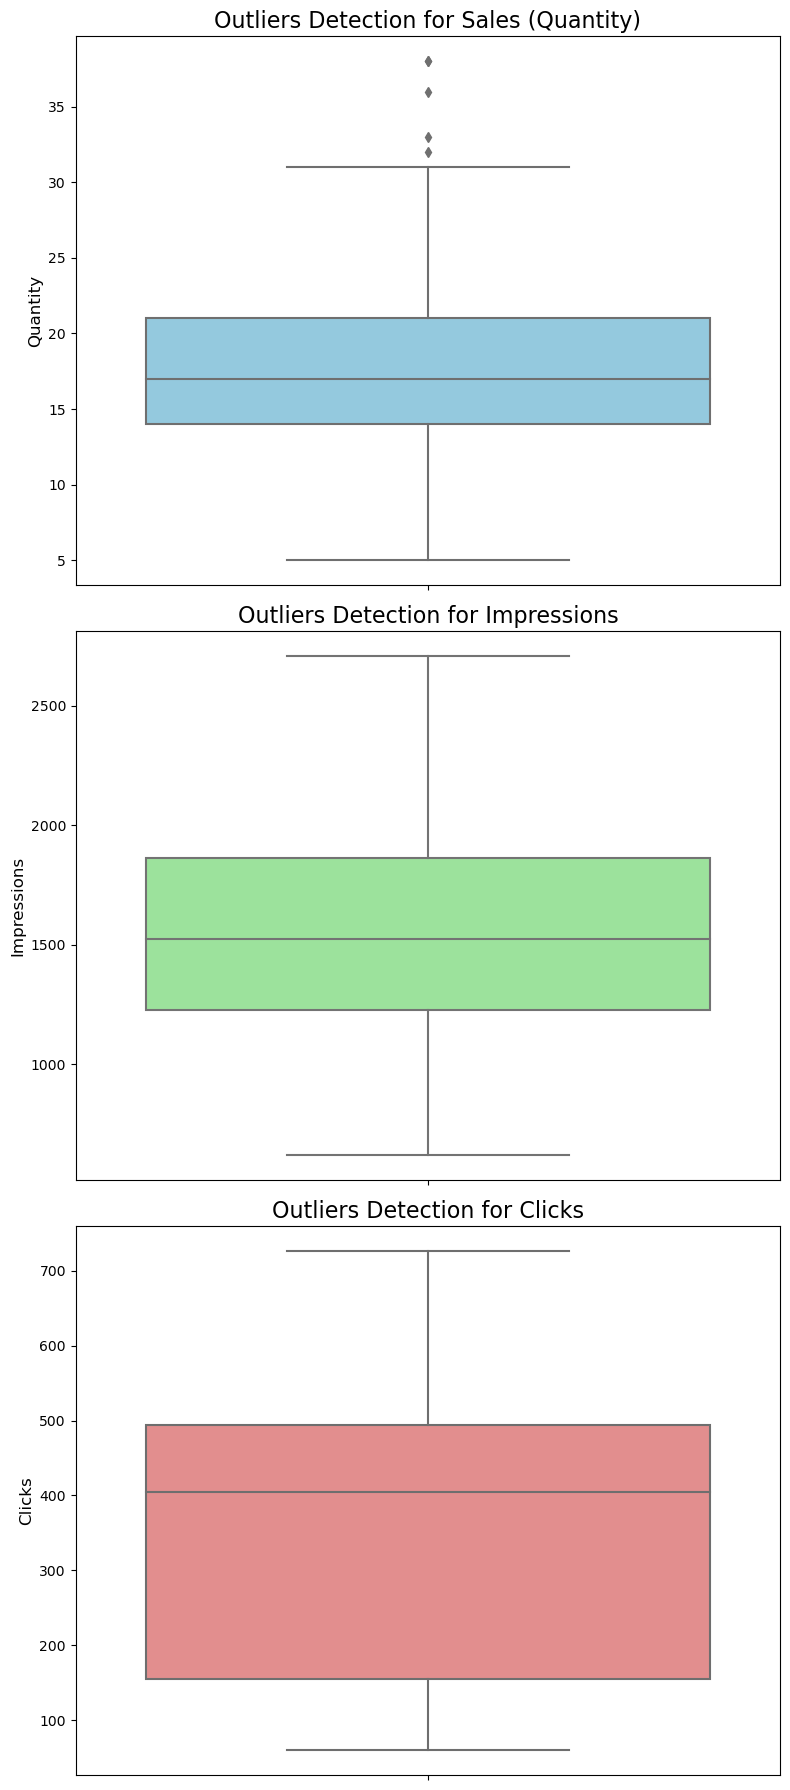